In [88]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df=pd.read_csv('bigdatamart.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [3]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [5]:
imp=SimpleImputer(strategy='mean')

In [6]:
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
df['Item_Weight'].mean()

12.695633368756406

the nan value is replaced by the mean of itemweight.

In [8]:
imp=SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [9]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [10]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [11]:
df.drop(['Item_Identifier'],axis=1,inplace=True)

In [12]:
df.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [13]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [14]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

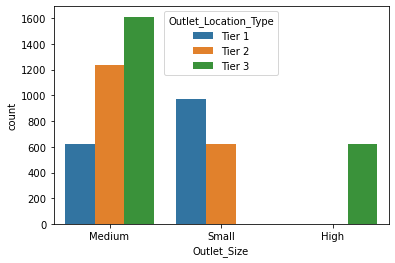

In [15]:
sns.countplot(x='Outlet_Size',hue='Outlet_Location_Type',data=df)

oservations:
    most of medium level outlets are in all tiers.
only high level outlets are working in tier3 locations.
small_size_outlets works only in tier 1 & 2 locations.

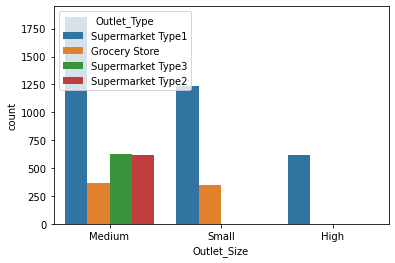

In [16]:
sns.countplot(x='Outlet_Size',hue='Outlet_Type',data=df)

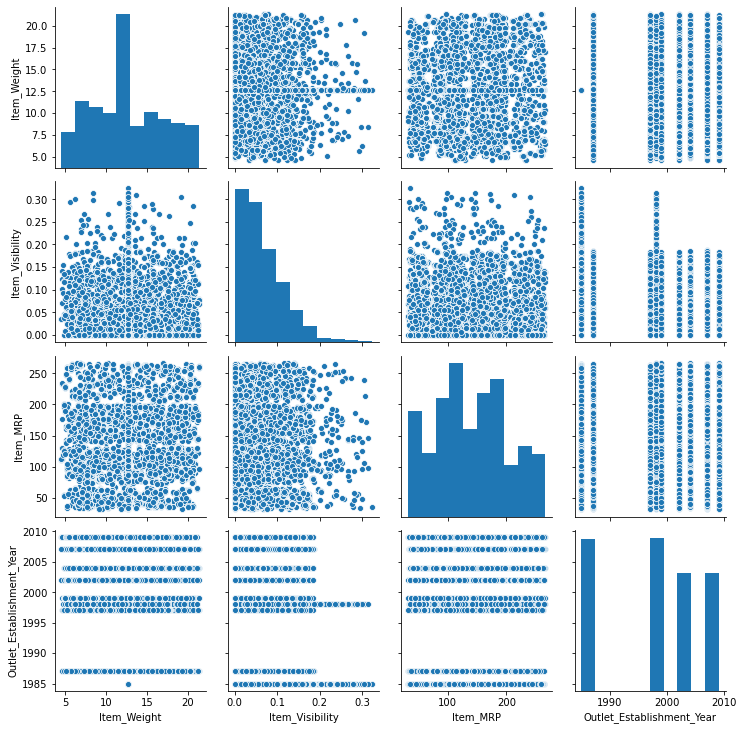

In [17]:
sns.pairplot(df)

In [18]:
df.skew()

Item_Weight                  0.142813
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

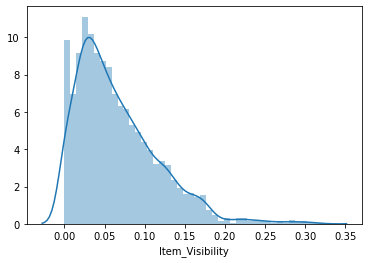

In [19]:
sns.distplot(df['Item_Visibility'])

In [20]:
df['Item_Visibility']=np.log1p(df['Item_Visibility'])

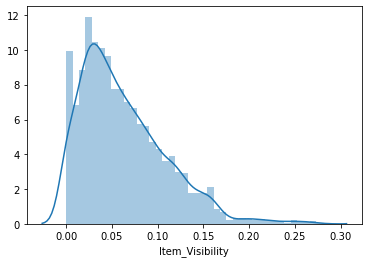

In [21]:
sns.distplot(df['Item_Visibility'])

In [22]:
df.skew()

Item_Weight                  0.142813
Item_Visibility              1.075093
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

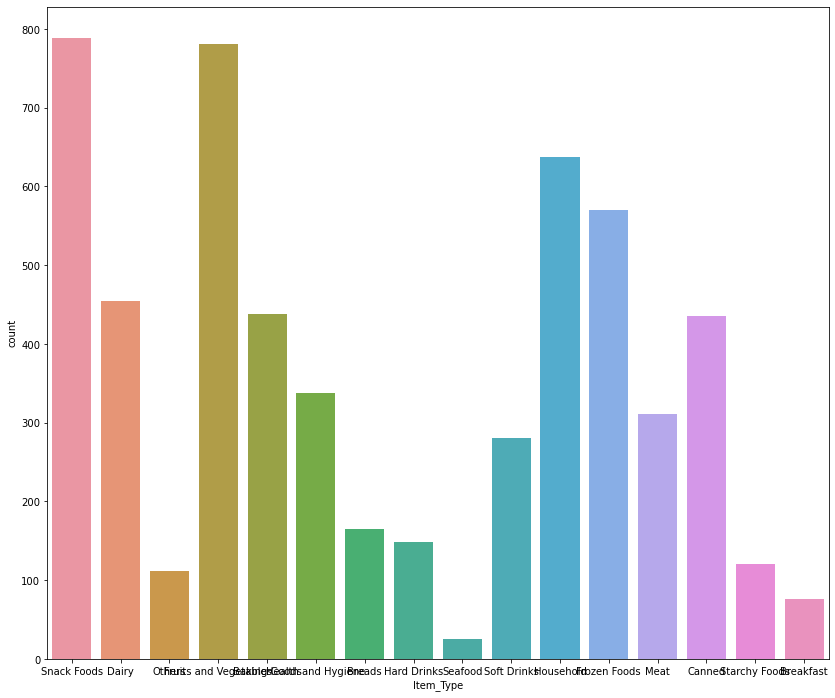

In [23]:
plt.figure(figsize=(14,12))
sns.countplot(x='Item_Type',data=df)

this indicates that most people prefer snack foods over any other type of foods whereas seafood is least prefereable.

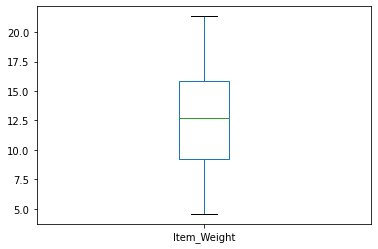

In [24]:
df['Item_Weight'].plot.box()

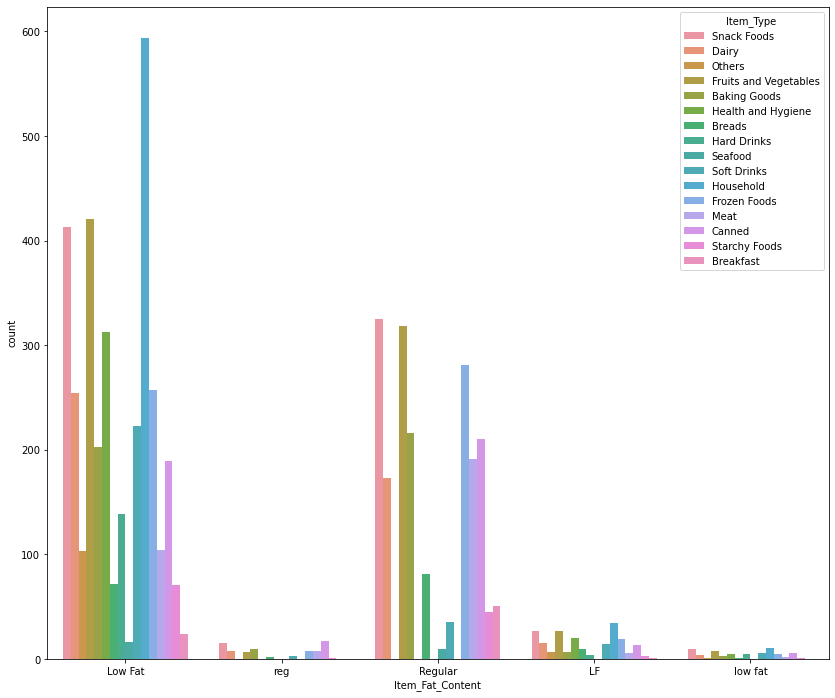

In [25]:
plt.figure(figsize=(14,12))
sns.countplot(x='Item_Fat_Content',hue='Item_Type',data=df)

this indicates most of the are in low fat catagory in which the household foods are top of the list.

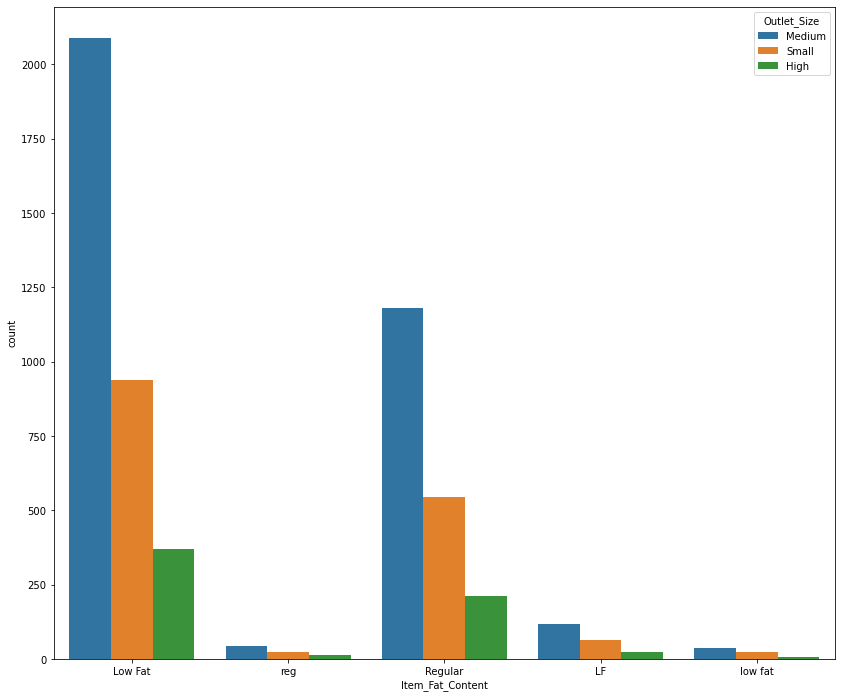

In [26]:
plt.figure(figsize=(14,12))
sns.countplot(x='Item_Fat_Content',hue='Outlet_Size',data=df)

in the medium size outlet people are getting most fat content in all stages.

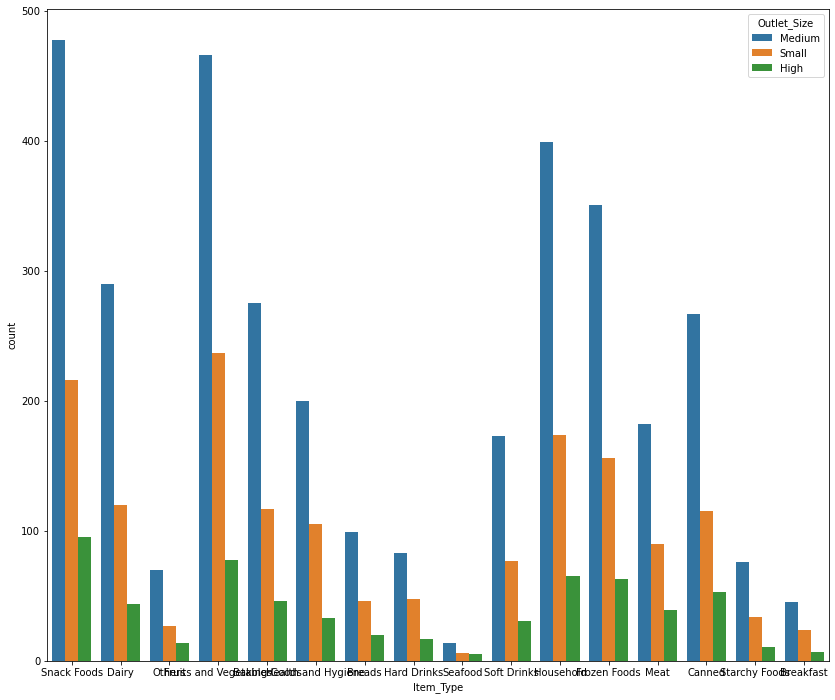

In [27]:
plt.figure(figsize=(14,12))
sns.countplot(x='Item_Type',hue='Outlet_Size',data=df)

most of the items are occupied by the medium size outlets,

Item_Weight                     AxesSubplot(0.125,0.536818;0.352273x0.343182)
Item_Visibility              AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Item_MRP                           AxesSubplot(0.125,0.125;0.352273x0.343182)
Outlet_Establishment_Year       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

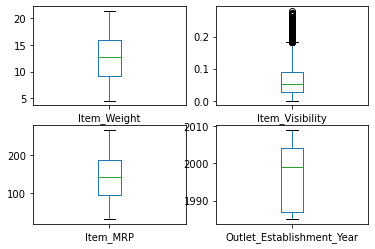

In [28]:
df.plot(kind='box',subplots=True,layout=(2,2))

In [29]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007536,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.037708,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.094924,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015271,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.112077,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013406,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.133648,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.070951,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [30]:
df.drop(['Item_Fat_Content'],axis=1,inplace=True)

In [31]:
df.drop(['Item_Type'],axis=1,inplace=True)

In [32]:
df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [33]:
df.drop(['Outlet_Size'],axis=1,inplace=True)

In [34]:
df.drop(['Outlet_Type'],axis=1,inplace=True)

In [35]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type
0,20.750000,0.007536,107.8622,Tier 1
1,8.300000,0.037708,87.3198,Tier 2
2,14.600000,0.094924,241.7538,Tier 3
3,7.315000,0.015271,155.0340,Tier 2
4,12.695633,0.112077,234.2300,Tier 3
...,...,...,...,...
5676,10.500000,0.013406,141.3154,Tier 1
5677,7.600000,0.133648,169.1448,Tier 3
5678,10.000000,0.070951,118.7440,Tier 2
5679,15.300000,0.000000,214.6218,Tier 2


In [36]:
le=LabelEncoder()
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type
0,20.750000,0.007536,107.8622,0
1,8.300000,0.037708,87.3198,1
2,14.600000,0.094924,241.7538,2
3,7.315000,0.015271,155.0340,1
4,12.695633,0.112077,234.2300,2
...,...,...,...,...
5676,10.500000,0.013406,141.3154,0
5677,7.600000,0.133648,169.1448,2
5678,10.000000,0.070951,118.7440,1
5679,15.300000,0.000000,214.6218,1


i am making my outlet_location_type as a target variable as there is no null value present in this column.

In [37]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.062500,141.023273,1.112832
std,4.245189,0.046860,61.809091,0.812824
min,4.555000,0.000000,31.990000,0.000000
25%,9.195000,0.026688,94.412000,0.000000
50%,12.695633,0.052739,141.415400,1.000000
75%,15.850000,0.089349,186.026600,2.000000
max,21.350000,0.280383,266.588400,2.000000


In [38]:
df.shape

(5681, 4)

# removing outliers

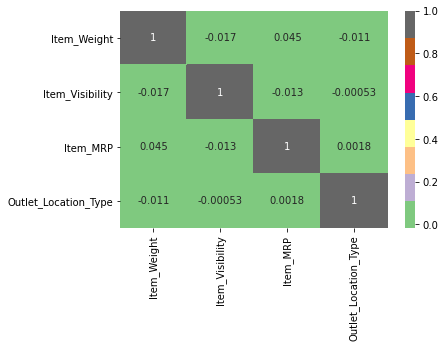

In [39]:
sns.heatmap(df.corr(),annot=True,cmap='Accent')

In [40]:
threshold=3
z=np.abs(zscore(df))
z

array([[1.89745979, 1.17305245, 0.53655526, 1.369215  ],
       [1.03552991, 0.52912867, 0.86893692, 0.1388274 ],
       [0.44863355, 0.69198668, 1.62984753, 1.0915602 ],
       ...,
       [0.63504136, 0.18035565, 0.36048475, 0.1388274 ],
       [0.6135406 , 1.33389527, 1.19084433, 0.1388274 ],
       [0.75283211, 0.79162046, 0.99067406, 0.1388274 ]])

In [41]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(5612, 4)

# model selection:

In [43]:
df_new

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type
0,20.750000,0.007536,107.8622,0
1,8.300000,0.037708,87.3198,1
2,14.600000,0.094924,241.7538,2
3,7.315000,0.015271,155.0340,1
4,12.695633,0.112077,234.2300,2
...,...,...,...,...
5676,10.500000,0.013406,141.3154,0
5677,7.600000,0.133648,169.1448,2
5678,10.000000,0.070951,118.7440,1
5679,15.300000,0.000000,214.6218,1


In [49]:
x=df_new.iloc[:,:-1]

In [50]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.89096192, -1.22903442, -0.53813786],
       [-1.03327836, -0.52740344, -0.87074244],
       [ 0.44645769,  0.80314587,  1.62971784],
       ...,
       [-0.6339845 ,  0.24566346, -0.36194927],
       [ 0.6108728 , -1.40429165,  1.19042023],
       [-0.75142387,  0.91170864, -0.99256123]])

In [51]:
x=pd.DataFrame(x)
x.shape

(5612, 3)

In [52]:
y=df_new.iloc[:,3]

In [53]:
y.shape

(5612,)

In [54]:
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    acc_score=accuracy_score(y_test,predlg)
    print('the accuracy score for',r_state,'is:',acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print('the max accuracy score for the',final_r_state,'is:',max_acc_score)

the accuracy score for 40 is: 0.39269813000890474
the accuracy score for 41 is: 0.396260017809439
the accuracy score for 42 is: 0.39715048975957257
the accuracy score for 43 is: 0.37399821905609976
the accuracy score for 44 is: 0.40338379341050756
the accuracy score for 45 is: 0.40071237756010686
the accuracy score for 46 is: 0.390026714158504
the accuracy score for 47 is: 0.37934105075690117
the accuracy score for 48 is: 0.390026714158504
the accuracy score for 49 is: 0.39091718610863757
the accuracy score for 50 is: 0.396260017809439
the accuracy score for 51 is: 0.37934105075690117
the accuracy score for 52 is: 0.39804096170970615
the accuracy score for 53 is: 0.3873552983081033
the accuracy score for 54 is: 0.3846838824577026
the accuracy score for 55 is: 0.40071237756010686
the accuracy score for 56 is: 0.39180765805877116
the accuracy score for 57 is: 0.39715048975957257
the accuracy score for 58 is: 0.41852181656277826
the accuracy score for 59 is: 0.396260017809439
the accuracy

In [71]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=64)

In [73]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('the accuracy score of',m,'is:',accuracy_score(y_test,predm))
    print('confusion matrix of',m,confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

the accuracy score of LogisticRegression() is: 0.41700404858299595
confusion matrix of LogisticRegression() [[  0  33 299]
 [  0  43 355]
 [  0  33 472]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       332
           1       0.39      0.11      0.17       398
           2       0.42      0.93      0.58       505

    accuracy                           0.42      1235
   macro avg       0.27      0.35      0.25      1235
weighted avg       0.30      0.42      0.29      1235

the accuracy score of DecisionTreeClassifier() is: 0.3174089068825911
confusion matrix of DecisionTreeClassifier() [[ 74 130 128]
 [139 131 128]
 [133 185 187]]
              precision    recall  f1-score   support

           0       0.21      0.22      0.22       332
           1       0.29      0.33      0.31       398
           2       0.42      0.37      0.39       505

    accuracy                           0.32      1235
   macro avg       0.31      0.3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the accuracy score of SVC() is: 0.4380566801619433
confusion matrix of SVC() [[  2 136 194]
 [  0 238 160]
 [  1 203 301]]
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       332
           1       0.41      0.60      0.49       398
           2       0.46      0.60      0.52       505

    accuracy                           0.44      1235
   macro avg       0.51      0.40      0.34      1235
weighted avg       0.50      0.44      0.37      1235

the accuracy score of KNeighborsClassifier() is: 0.35465587044534413
confusion matrix of KNeighborsClassifier() [[100 135  97]
 [148 172  78]
 [165 174 166]]
              precision    recall  f1-score   support

           0       0.24      0.30      0.27       332
           1       0.36      0.43      0.39       398
           2       0.49      0.33      0.39       505

    accuracy                           0.35      1235
   macro avg       0.36      0.35      0.35      1235
weighted avg

In [75]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred=svc.predict(x_test)
    print('the accuracy score is:',accuracy_score(y_test,pred))
    print('confusion matrix of',confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [76]:
svmkernel('rbf')

the accuracy score is: 0.4380566801619433
confusion matrix of [[  2 136 194]
 [  0 238 160]
 [  1 203 301]]
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       332
           1       0.41      0.60      0.49       398
           2       0.46      0.60      0.52       505

    accuracy                           0.44      1235
   macro avg       0.51      0.40      0.34      1235
weighted avg       0.50      0.44      0.37      1235



In [77]:
svmkernel('poly')

the accuracy score is: 0.4089068825910931
confusion matrix of [[  0   0 332]
 [  0   0 398]
 [  0   0 505]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       332
           1       0.00      0.00      0.00       398
           2       0.41      1.00      0.58       505

    accuracy                           0.41      1235
   macro avg       0.14      0.33      0.19      1235
weighted avg       0.17      0.41      0.24      1235



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
svmkernel('linear')

the accuracy score is: 0.4089068825910931
confusion matrix of [[  0   0 332]
 [  0   0 398]
 [  0   0 505]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       332
           1       0.00      0.00      0.00       398
           2       0.41      1.00      0.58       505

    accuracy                           0.41      1235
   macro avg       0.14      0.33      0.19      1235
weighted avg       0.17      0.41      0.24      1235



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()

# cross validation:

In [80]:
crossvalidation=[lg,dtc,knn,svc]

In [81]:
for c in crossvalidation:
    cross_scores=cross_val_score(c,x,y,cv=5)
    print('the score of:',c,cross_scores)
    print('the mean and standard deviation of:',c,cross_scores.mean(),cross_scores.std())
    print('\n')

the score of: LogisticRegression() [0.3935886  0.3935886  0.40017825 0.39037433 0.39215686]
the mean and standard deviation of: LogisticRegression() 0.39397733026668125 0.003318112878243557


the score of: DecisionTreeClassifier() [0.34728406 0.31522707 0.31818182 0.28609626 0.31016043]
the mean and standard deviation of: DecisionTreeClassifier() 0.31538992671463467 0.019547499666491063


the score of: KNeighborsClassifier() [0.36776492 0.32591273 0.33333333 0.32442068 0.33868093]
the mean and standard deviation of: KNeighborsClassifier() 0.33802251735309197 0.01573968933556087


the score of: SVC() [0.42742654 0.42119323 0.4402852  0.40106952 0.44385027]
the mean and standard deviation of: SVC() 0.42676495191292735 0.015273783334963065




# ensemble:

In [87]:
rf=RandomForestClassifier(n_estimators=100,random_state=64)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('the accuracy score',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

the accuracy score 0.31093117408906884
[[ 60 141 131]
 [138 126 134]
 [102 205 198]]
              precision    recall  f1-score   support

           0       0.20      0.18      0.19       332
           1       0.27      0.32      0.29       398
           2       0.43      0.39      0.41       505

    accuracy                           0.31      1235
   macro avg       0.30      0.30      0.30      1235
weighted avg       0.31      0.31      0.31      1235



In [86]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=rf.predict(x_test)
print('the accuracy score',accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

the accuracy score 0.31093117408906884
[[ 60 141 131]
 [138 126 134]
 [102 205 198]]
              precision    recall  f1-score   support

           0       0.20      0.18      0.19       332
           1       0.27      0.32      0.29       398
           2       0.43      0.39      0.41       505

    accuracy                           0.31      1235
   macro avg       0.30      0.30      0.30      1235
weighted avg       0.31      0.31      0.31      1235



In [89]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
predgb=rf.predict(x_test)
print('the accuracy score',accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

the accuracy score 0.31093117408906884
[[ 60 141 131]
 [138 126 134]
 [102 205 198]]
              precision    recall  f1-score   support

           0       0.20      0.18      0.19       332
           1       0.27      0.32      0.29       398
           2       0.43      0.39      0.41       505

    accuracy                           0.31      1235
   macro avg       0.30      0.30      0.30      1235
weighted avg       0.31      0.31      0.31      1235

